# TASK 1
# Exploratory  Data Analysis  

In [1]:
import pandas as pd 
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Create the dataframe
df= pd.read_csv("cleaned_BA_reviews.csv")

# let check the index are in order
df = df.reset_index(drop =True)

In [3]:
df.head()

,Unnamed: 0,reviews,stars,date,country,verified,corpus
0,0,Not Verified | They changed our Flights from ...,5,2023-04-18,United States,False,verified changed flight brussels london heathr...
1,1,Not Verified | At Copenhagen the most chaotic...,2,2023-04-18,United States,False,verified copenhagen chaotic ticket counter ass...
2,2,✅ Trip Verified | Worst experience of my life...,5,2023-04-17,United States,True,worst experience life trying deal customer ser...
3,3,✅ Trip Verified | Due to code sharing with Ca...,1,2023-04-17,Hong Kong,True,due code sharing cathay pacific downgraded ba ...
4,4,✅ Trip Verified | LHR check in was quick at t...,3,2023-04-16,United Kingdom,True,lhr check quick first wing quickly security fi...


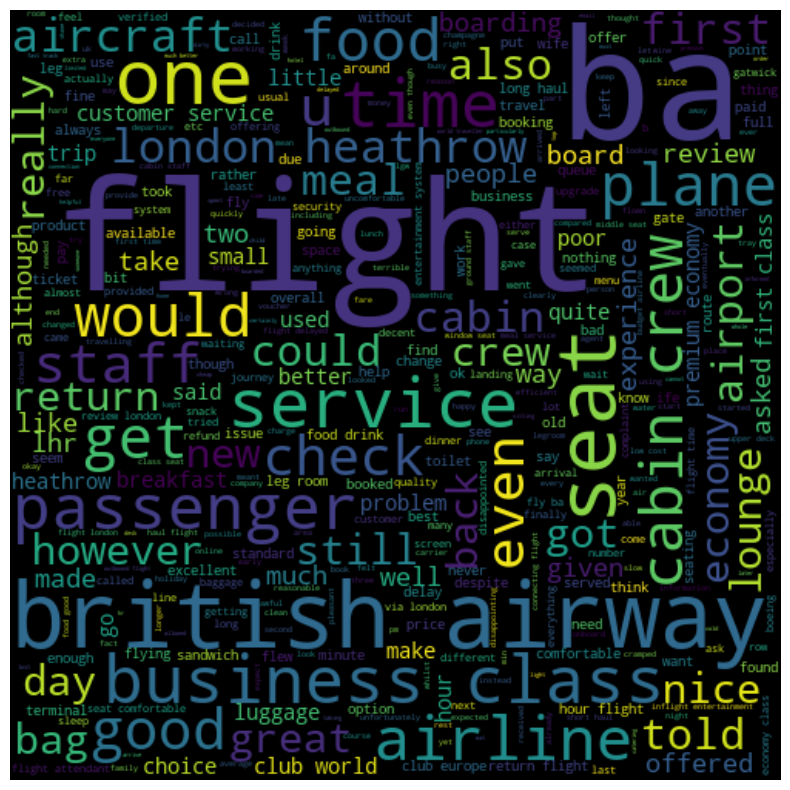

In [4]:
import nltk
from nltk.corpus import stopwords
# starts with one review
reviews = " ".join(df.corpus)
plt.figure(figsize = (20,10))

stopwords = set(stopwords.words('english'))

# create the word cloud  image
wordcloud= WordCloud(height = 500 , width = 500 ,max_font_size=100 ,max_words=400 , stopwords= stopwords).generate(reviews) 

plt.imshow(wordcloud , interpolation= 'bilinear')
plt.axis("off")
plt.show()

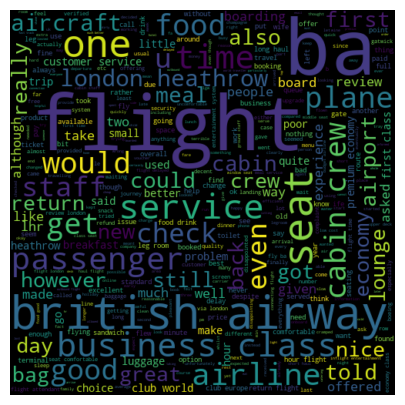

In [5]:
import nltk
from nltk.corpus import  stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(15, 5))

stopwords = set(stopwords.words('english'))
stopwords.update(['ba' ,'british', 'airway' , 'flight' ,'plane' , 'london' ,'airline' 'alse'
                  'told' ,'passenger' , 'could' , 'heathrow'])

plt.imshow(wordcloud , interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [6]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn .feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer

#split the text of all reviews into alist of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the  poitive and negative  sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['ba' , 'passenger', 'flight' , 'u' , 'london' ,'airway' , 'british airway'
                                     'plane' , 'heathrow' ,'reviews'])



# Word Frequency with N-gram

<AxesSubplot:>

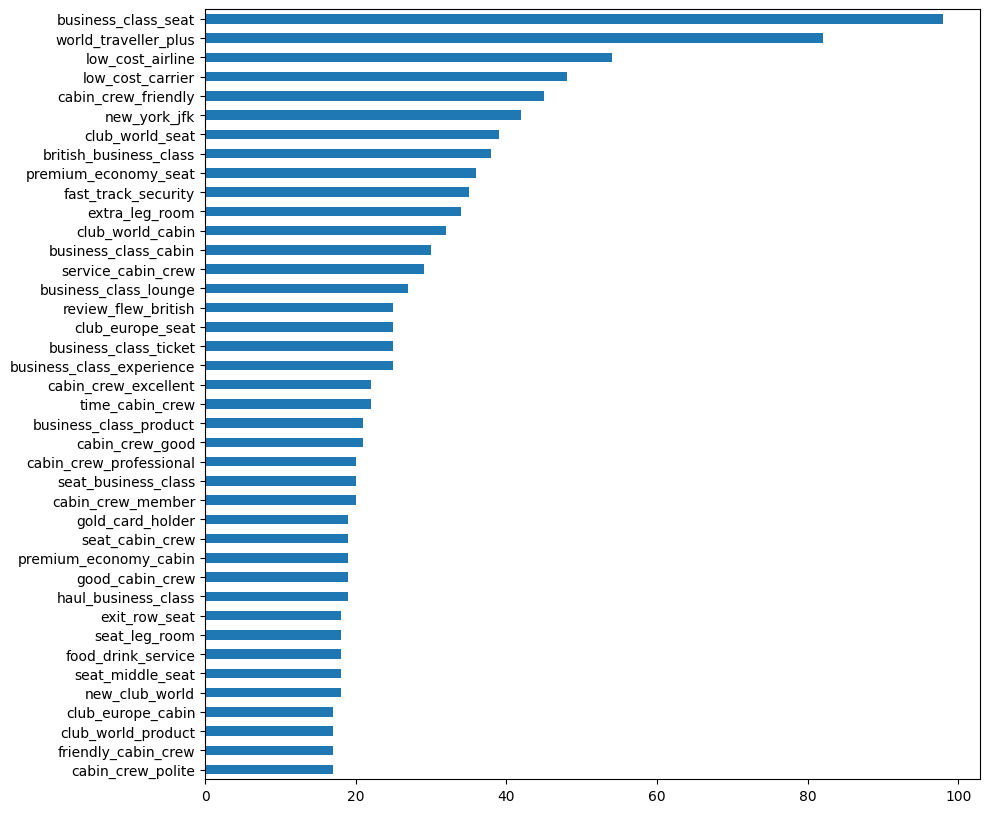

In [7]:
import nltk.collocations as collocations
from nltk import FreqDist , bigrams

reviews = " ".join(df.corpus)

# split the text of all reviews into list of  words

words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words , number_of_ngrams):
    from nltk import ngrams


    # Generat bigrams
                       
    ngrams =ngrams(new_words , number_of_ngrams)

    # Creating FreqDist

    ngram_fd = FreqDist(ngrams).most_common(40)


    # Sort thr values by highest frequence
    ngrams_sorted = {k:v for k ,v  in sorted(ngram_fd , key= lambda item:item[1])}

    # Join bigram taken with '-' + maintain sorting
    ngram_joined = {'_'.join(k):v for k , v in sorted(ngram_fd , key= lambda item:item[1])}

    # Convert to pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax
get_freq_dist(new_words , 3)

we can see that there are very similar positive reviews regarding cabin crew.for example good_cabin_crew ,cabin_crew_polite,cabin_crew_friendly_attentive, cabin_crew_friendly_helpful ,etc.So certainly customer are providing  good reviews about the cobin crew staff of 
British Airways.
However, there is another approach that we can try to find the  world frequencies which will give us better idea.we will group the reviews based on rating.Now we assume ratings 1-3 are bad reviews , 4-6 are average reviews, 7-10 are indicates a great experience.

In [9]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 =df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<AxesSubplot:>

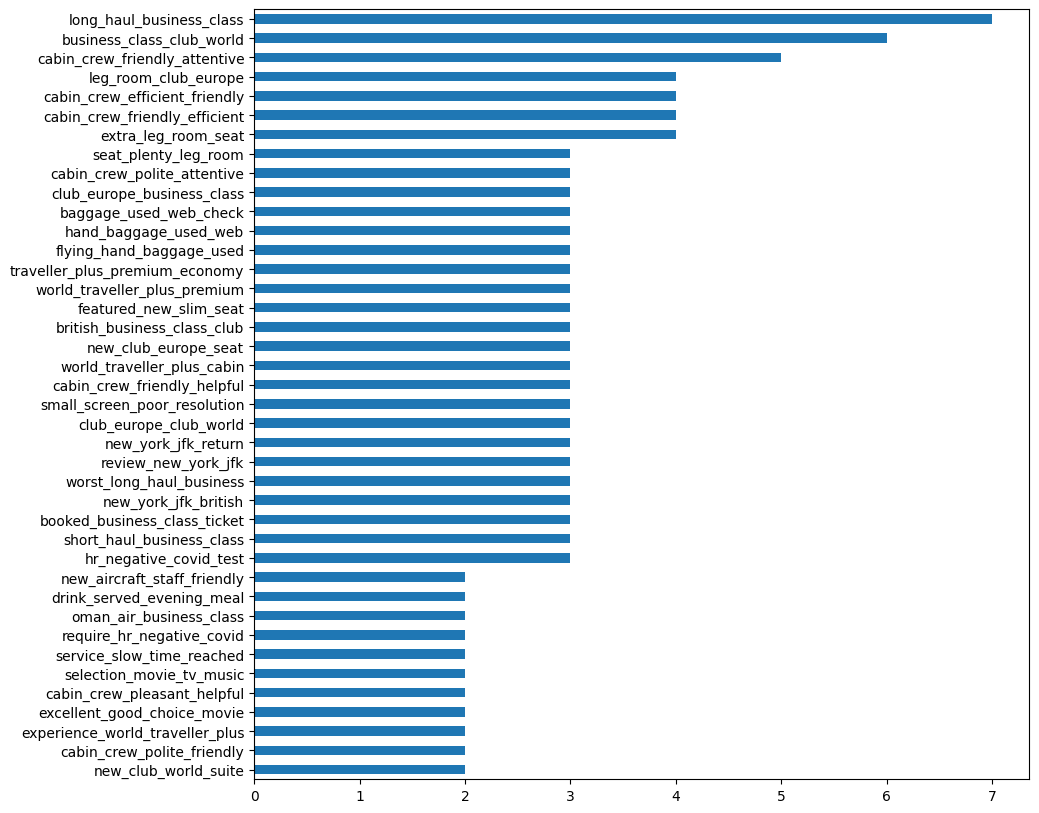

In [10]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10= " ".join(ratings_7_10.corpus)


# split the text os all reviews into list a words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 =reviews_7_10.split(" ")

new_words_7_10 = [word for word in words_7_10 if word not in stopwords]
get_freq_dist(new_words_7_10 , 4)


<AxesSubplot:>

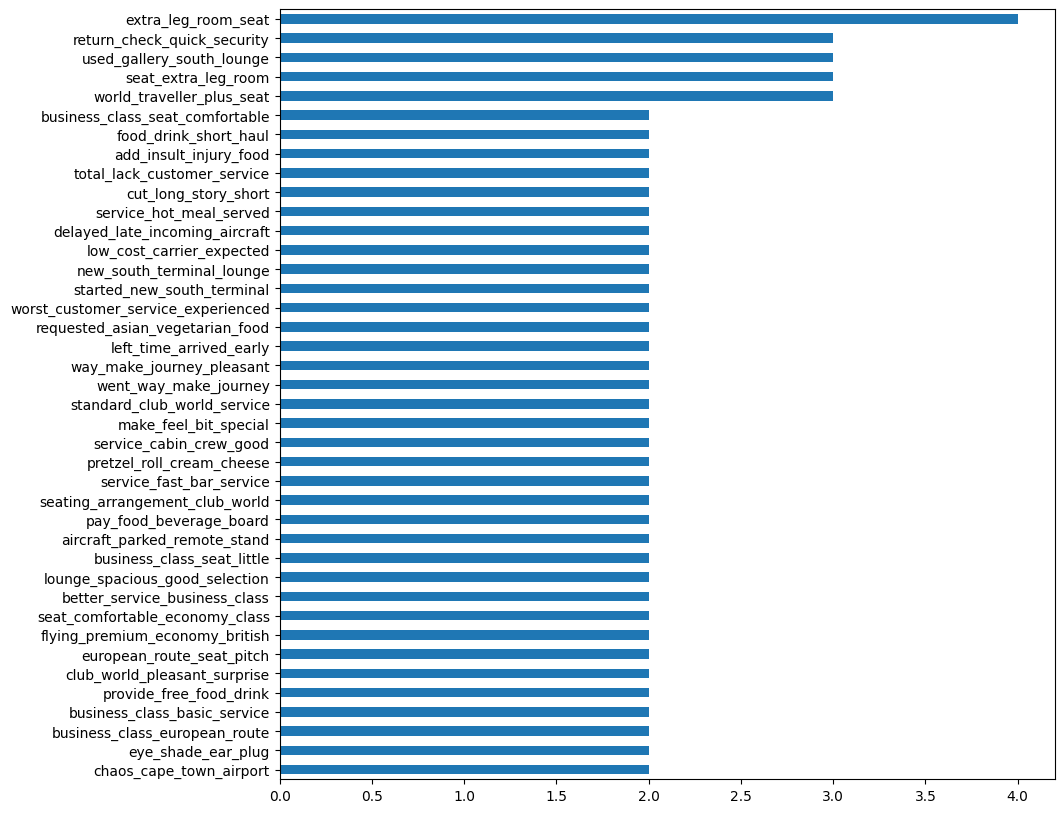

In [11]:
new_words_4_6 = [word for word in words_4_6 if word not in stopwords]
get_freq_dist(new_words_4_6 , 4)

<AxesSubplot:>

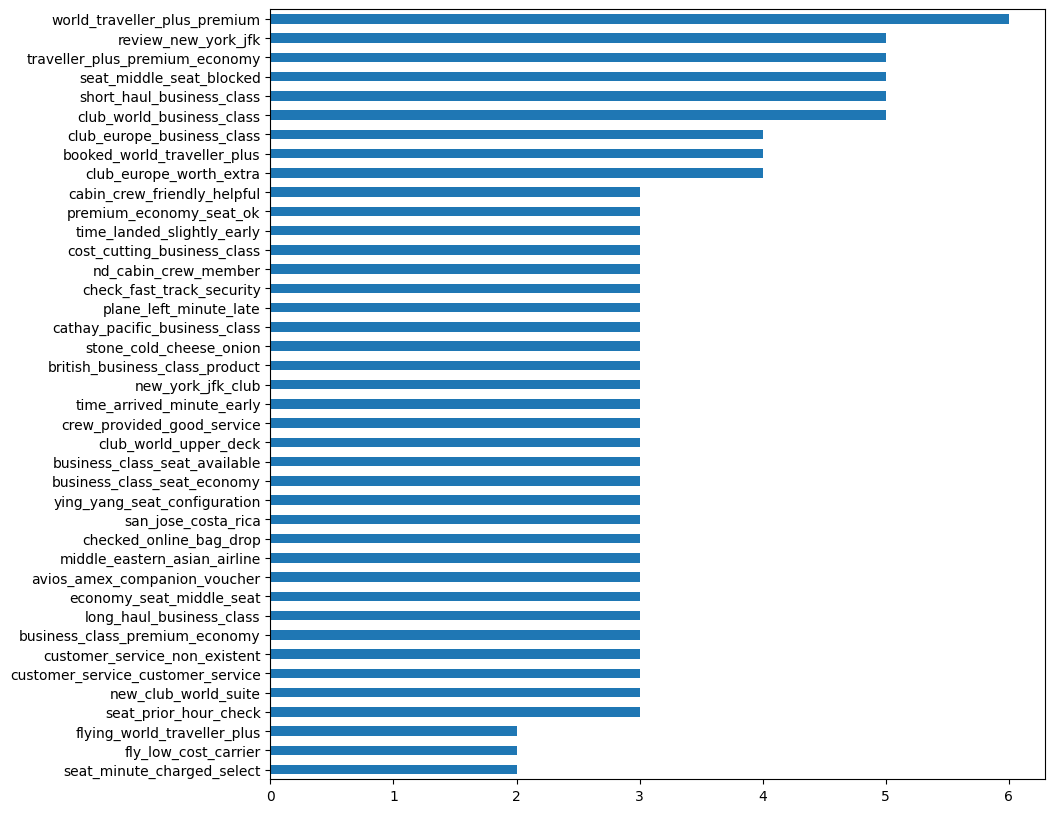

In [12]:
new_words_1_3 = [word for word in words_1_3 if word not in stopwords]
get_freq_dist(new_words_1_3 , 4)

# Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['reviews'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Unnamed: 0,reviews,stars,date,country,verified,corpus,Sentiment,Analysis
0,0,Not Verified | They changed our Flights from ...,5,2023-04-18,United States,False,verified changed flight brussels london heathr...,-0.8055,Negative
1,1,Not Verified | At Copenhagen the most chaotic...,2,2023-04-18,United States,False,verified copenhagen chaotic ticket counter ass...,0.1015,Neutral
2,2,✅ Trip Verified | Worst experience of my life...,5,2023-04-17,United States,True,worst experience life trying deal customer ser...,-0.9600,Negative
3,3,✅ Trip Verified | Due to code sharing with Ca...,1,2023-04-17,Hong Kong,True,due code sharing cathay pacific downgraded ba ...,-0.8510,Negative
4,4,✅ Trip Verified | LHR check in was quick at t...,3,2023-04-16,United Kingdom,True,lhr check quick first wing quickly security fi...,0.9251,Positive


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    1753
Negative    1420
Neutral      321
Name: Analysis, dtype: int64

# Visualization

([<matplotlib.patches.Wedge at 0x28c61188b20>,
 [Text(-0.005934222332186562, 1.0999839930677684, 'Positive'),
  Text(-0.3074031871286056, -1.0561738874556479, 'Negative'),
  Text(1.2941592639729662, -0.3842548626536183, 'Neutral')],
 [Text(-0.0032368485448290335, 0.5999912689460554, '50.2%'),
  Text(-0.16767446570651212, -0.5760948477030806, '40.6%'),
  Text(0.8148410180570527, -0.24193824685598184, '9.2%')])

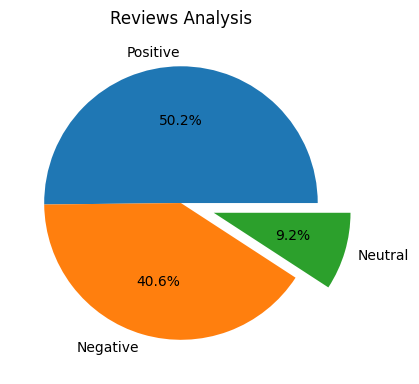

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [69]:
df.to_csv("Analysis_BA_reviews.csv")

# Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

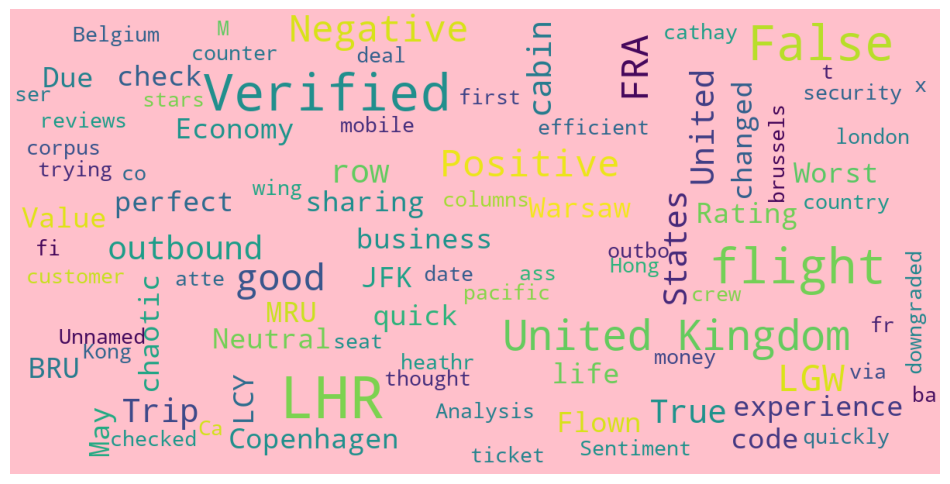

In [16]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='pink',
        stopwords=stopwords,
        max_words=100,
        max_font_size=25,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df)